# $k$-Means Clustering

## Dataset: Facebook Live Sellers in Thailand

The link of dataset is [here](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set theme 
sns.set_theme()

# Load data from csv
df = pd.read_csv('Live.csv')

# Exploratory Data Analysis
print(df.shape)
print(df.head())
print(df.info())

(7050, 16)
   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      

In [38]:
# Drop redundant or irrelevant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

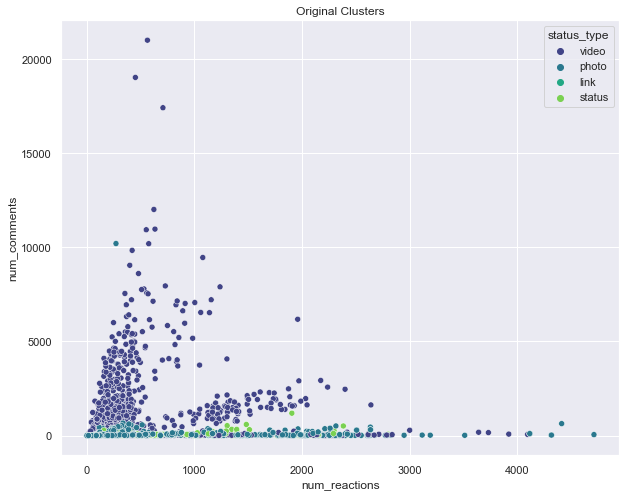

In [39]:
# plot the original clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='num_reactions', y='num_comments', hue='status_type', data=df, palette='viridis')
plt.title('Original Clusters')
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Convert categorical variable 'status_type' into integers
le = LabelEncoder()
df['status_type_encoded'] = le.fit_transform(df['status_type'])

# Select only the numerical features for scaling
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(numerical_features), 
                                   columns=numerical_features.columns)

# Combine the scaled numerical features and the encoded 'status_type'
df_scaled = pd.concat([df_scaled_numerical, df['status_type_encoded']], axis=1)


In [41]:
import numpy as np
class KMeans:
    """
    K-Means Clustering Algorithm

    Parameters
    ----------
    n_clusters : int, default=2
        The number of clusters to form as well as the number of centroids to generate.
    max_iters : int, default=100
        Maximum number of iterations of the k-means algorithm for a single run.
    random_state : int, default=42
        Determines random number generation for centroid initialization.
        Use an int to make the randomness deterministic.
    """
    def __init__(self, n_clusters=2, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.inertia_ = 0

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def closest_centroid(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_inertia(self, X, labels):
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            inertia += ((cluster_points - self.centroids[k])**2).sum()
        return inertia

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self.closest_centroid(X)
            centroids = self.compute_centroids(X, labels)
            if np.all(centroids == self.centroids):
                break
            self.centroids = centroids
        self.inertia_ = self.compute_inertia(X, labels)
        return self

    def predict(self, X):
        return self.closest_centroid(X)


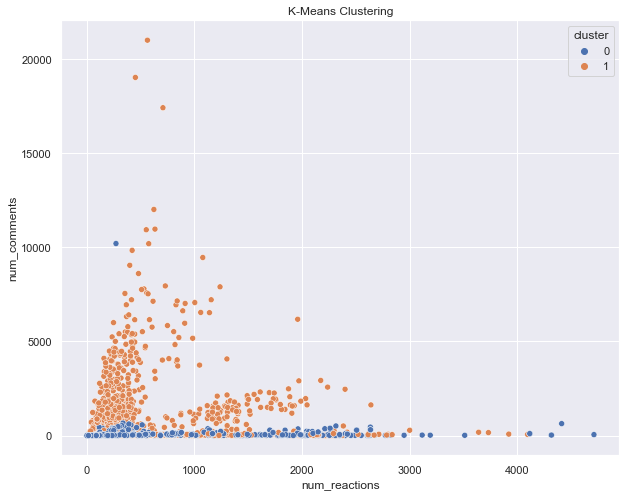

In [42]:
# Convert the DataFrame to a NumPy array before using it in KMeans
X_scaled_np = df_scaled.values

# Create an instance of your KMeans class
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model using the NumPy array
kmeans.fit(X_scaled_np)

# Predict the clusters
clusters = kmeans.predict(X_scaled_np)

# Add the cluster information to the original DataFrame
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='num_reactions', y='num_comments', hue='cluster', data=df)
plt.title('K-Means Clustering')
plt.show()

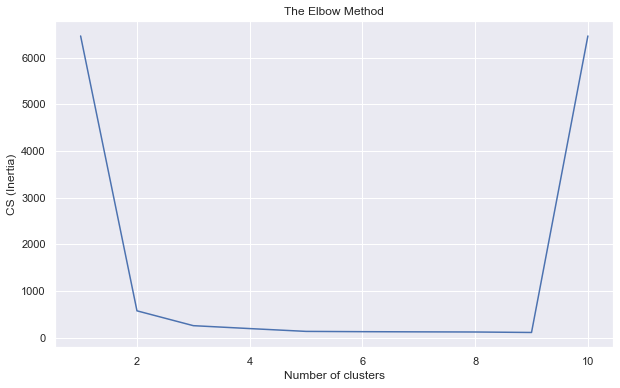

In [43]:
# Using the elbow method to find the optimal number of clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled_np)  # Make sure X_scaled_np is a NumPy array
    cs.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS (Inertia)')
plt.show()


In [44]:
# Model with the optimal number of clusters determined by the elbow method
# Assuming the optimal number is 4 from the elbow method plot
optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_optimal.fit(X_scaled_np)

# After fitting, you can access the centroids and inertia
print("Centroids:", kmeans_optimal.centroids)
print("Inertia:", kmeans_optimal.inertia_)

Centroids: [[3.70762995e-02 2.38485859e-02 2.47674444e-02 3.13111517e-02
  3.78268104e-02 2.46348376e-03 7.32261369e-03 5.97833539e-03
  5.20339875e-03 3.00000000e+00]
 [3.22288500e-01 1.07331534e-01 1.36127491e-01 2.81808378e-01
  2.38723394e-01 8.07925089e-02 5.33818623e-02 3.23685030e-02
  4.21573647e-02 3.00000000e+00]
 [9.31599919e-02 1.72645813e-03 7.47343490e-04 9.24689527e-02
  2.37693126e-03 4.21799547e-03 6.98019370e-04 7.57453666e-03
  7.95404331e-04 2.00000000e+00]
 [3.90710874e-02 7.54854864e-04 7.53667113e-04 3.85438884e-02
  2.17448568e-03 2.43721364e-03 1.20039760e-03 2.75348016e-03
  1.45313276e-03 9.85520570e-01]]
Inertia: 218.29890112259852


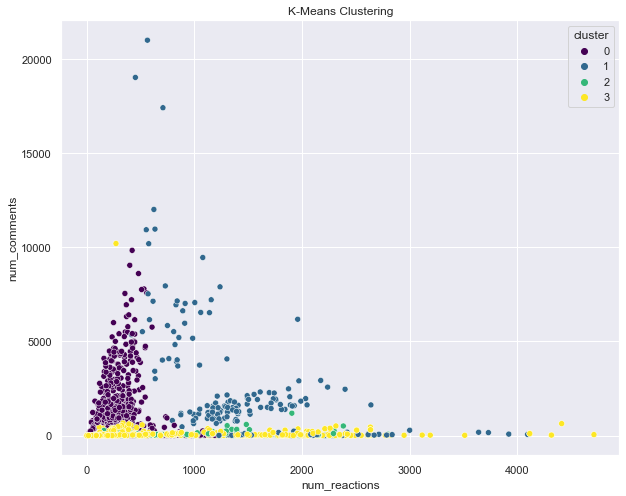

In [45]:
# Assuming df_scaled is your original DataFrame and kmeans_optimal is your fitted KMeans model
df['cluster'] = kmeans_optimal.predict(X_scaled_np)

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='num_reactions', y='num_comments', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()
